# Hard vs Soft Hillshade

In [1]:
demFile = r"Crater_Lake.tif"

Change the `demFile` variable to be the path to your copy of the crater lake GeoTIF
downloaded from shadedrelief.com.
The matplotlib directives below assume the geometry of the crater lake dataset.
You can use a different DEM, but you'll need to adjust the location and dimensions
of the swatch panel.

In [2]:
from PIL import Image
import numpy as np
import matplotlib
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
cm = 1/2.54  # centimeters in inches
phi = 1.618

In [3]:
import sys
sys.path.insert(0, '..')
from trf import surface, shader, utils

## Color Ramp
Creating custom color ramp for soft hillshade.

In [4]:
cut_off = 0.8
cdict = {
    'red':[
        (0.0, 0.0, 0.0), 
        (0.5, 1-cut_off, 1-cut_off), 
        (1.0, 1.0, 1.0)
    ],
    'green': [
        (0.0, 0.0, 0.0), 
        (0.5, 1-cut_off, 1-cut_off), 
        (1.0, 1.0, 1.0)
    ],
    'blue': [
        (0.0, 0.0, 0.0), 
        (0.5, 1-cut_off, 1-cut_off), 
        (1.0, 1.0, 1.0)
    ]
}
soft_lambert=matplotlib.colors.LinearSegmentedColormap('Lambert_80_20', cdict)

## Data Import
Read the DEM and create a hillshade.  The cellsize is hard-coded to that of the
Crater Lake dataset. If you're using a different DEM, you'll need to adjust that also.

In [6]:
d = np.asarray(Image.open(demFile))
lightAzimuth = 315
lightElev = 30
cellSize = 3.33
hs = shader.lambert(
    surface.normals(d, cellSize),
    utils.lightVector(lightAzimuth, lightElev)
)
hs=(hs +1)/2

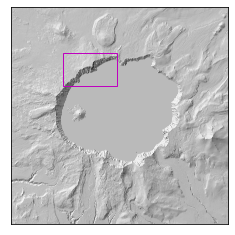

In [7]:
x=1900
y=1500
swatchHeight = 400
swatchWidth = int(swatchHeight * phi) #GoldenRatio

fig, axs = plt.subplots(1, 1)
axs.yaxis.set_visible(False)
axs.xaxis.set_visible(False)
axs.imshow(hs, cmap='gray')
axs.add_patch(Rectangle((x-swatchWidth, y-swatchHeight), swatchWidth*2, swatchHeight*2, fill=False, color='m'))

## Re-set datasets for swatch / smaller extent

In [8]:
dem = d[y-swatchHeight:y+swatchHeight, x-swatchWidth:x+swatchWidth]
hs = shader.lambert(
    surface.normals(dem, cellSize),
    utils.lightVector(lightAzimuth, lightElev)
)
soft_hs = np.copy((hs+1)/2)
hs[hs<0]=0
hard_hs = np.zeros(hs.shape, dtype='uint8')
hard_hs = (hs/hs.max()) * 255

del hs

## Compute hard and soft hillshades

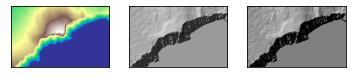

In [9]:
fig, axs = plt.subplots(1, 3)
#DEM
axs[0].yaxis.set_visible(False)
axs[0].xaxis.set_visible(False)
axs[0].imshow(dem, cmap='terrain')

#Soft HS
axs[1].yaxis.set_visible(False)
axs[1].xaxis.set_visible(False)
axs[1].imshow(soft_hs, cmap=soft_lambert, vmin=0, vmax=1)

#Hard HS
axs[2].yaxis.set_visible(False)
axs[2].xaxis.set_visible(False)
axs[2].imshow(hard_hs, cmap='gray', vmin=0, vmax=255)


## Figure: Soft Hillshade w/ Histogram

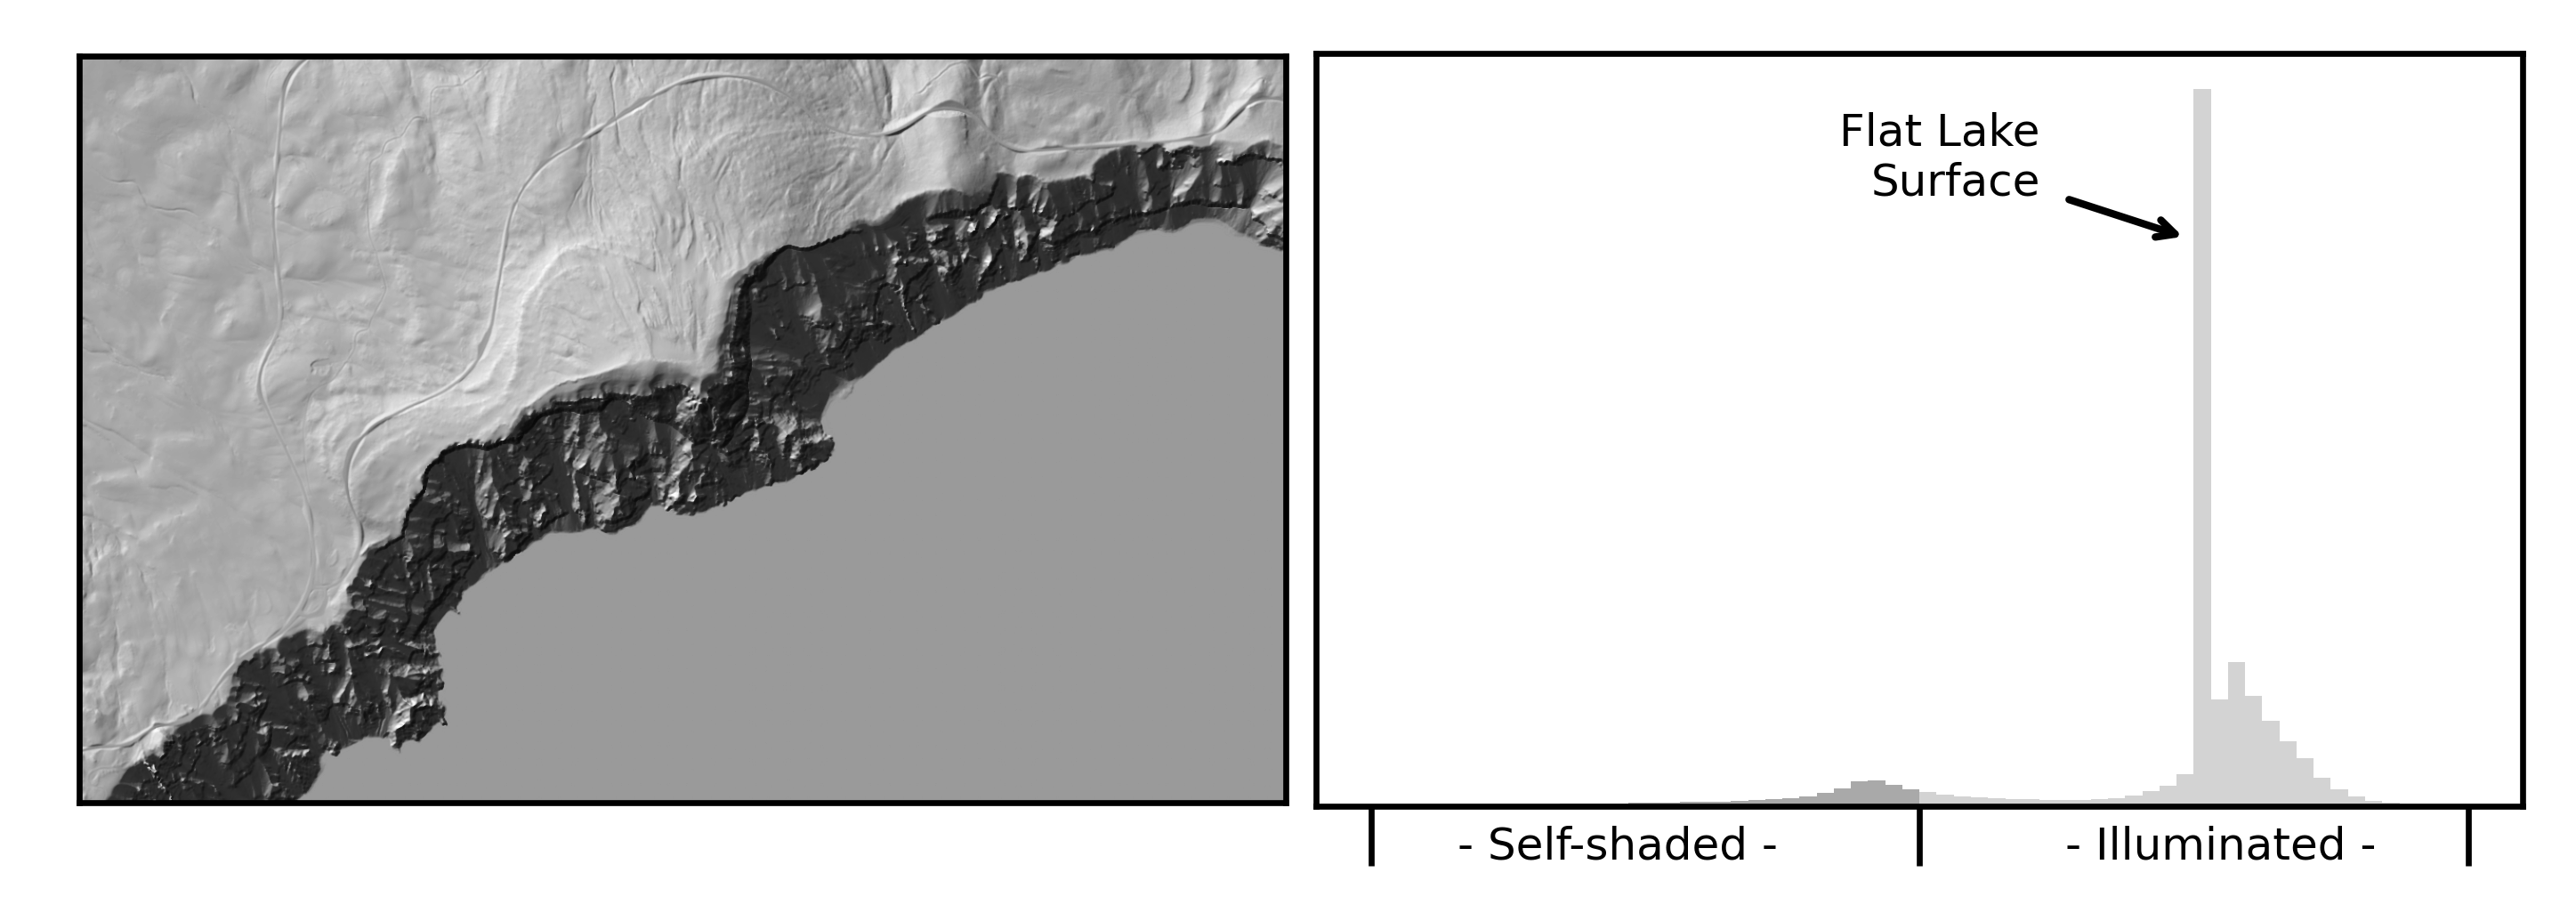

In [10]:
w_ = 15*cm
fig, axes = plt.subplots(1, 2 , figsize=(w_, 0.11*cm + (w_/2)/phi))
fig.set_dpi(600)

#Soft HS
axes[0].yaxis.set_visible(False)
axes[0].xaxis.set_visible(False)
axes[0].imshow(soft_hs, cmap=soft_lambert, vmin=0, vmax=1)

#Soft Histogram
axes[1].yaxis.set_visible(False)
axes[1].xaxis.set_visible(True)
axes[1].hist(soft_hs[soft_hs>=0.5].ravel(), color='lightgray', bins=64, range=[0,1])
axes[1].hist(soft_hs[soft_hs<0.5].ravel(), color='darkgray', bins=64, range=[0,1])
axes[1].set_xticks([0,0.5,1])
axes[1].set_xticklabels(['', '',''])
axes[1].tick_params(direction='out', length=8)
axes[1].text(0.25, -0.025, '- Self-shaded -',
        verticalalignment='top', horizontalalignment='center',
        transform=axes[1].transAxes,
        color='k', fontsize=6)
axes[1].text(0.75, -0.025, '- Illuminated -',
        verticalalignment='top', horizontalalignment='center',
        transform=axes[1].transAxes,
        color='k', fontsize=6)
axes[1].annotate("Flat Lake\nSurface",
            xy=(0.73, 0.75), xycoords='axes fraction',
            xytext=(0.6, 0.8), textcoords='axes fraction',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3", color='k'),
            horizontalalignment='right', verticalalignment='bottom', fontsize=6, color='k'
            )
fig.subplots_adjust(hspace=0.0)
fig.subplots_adjust(wspace=0.025)

## Hard Hillshade (traditional) w/ Histogram

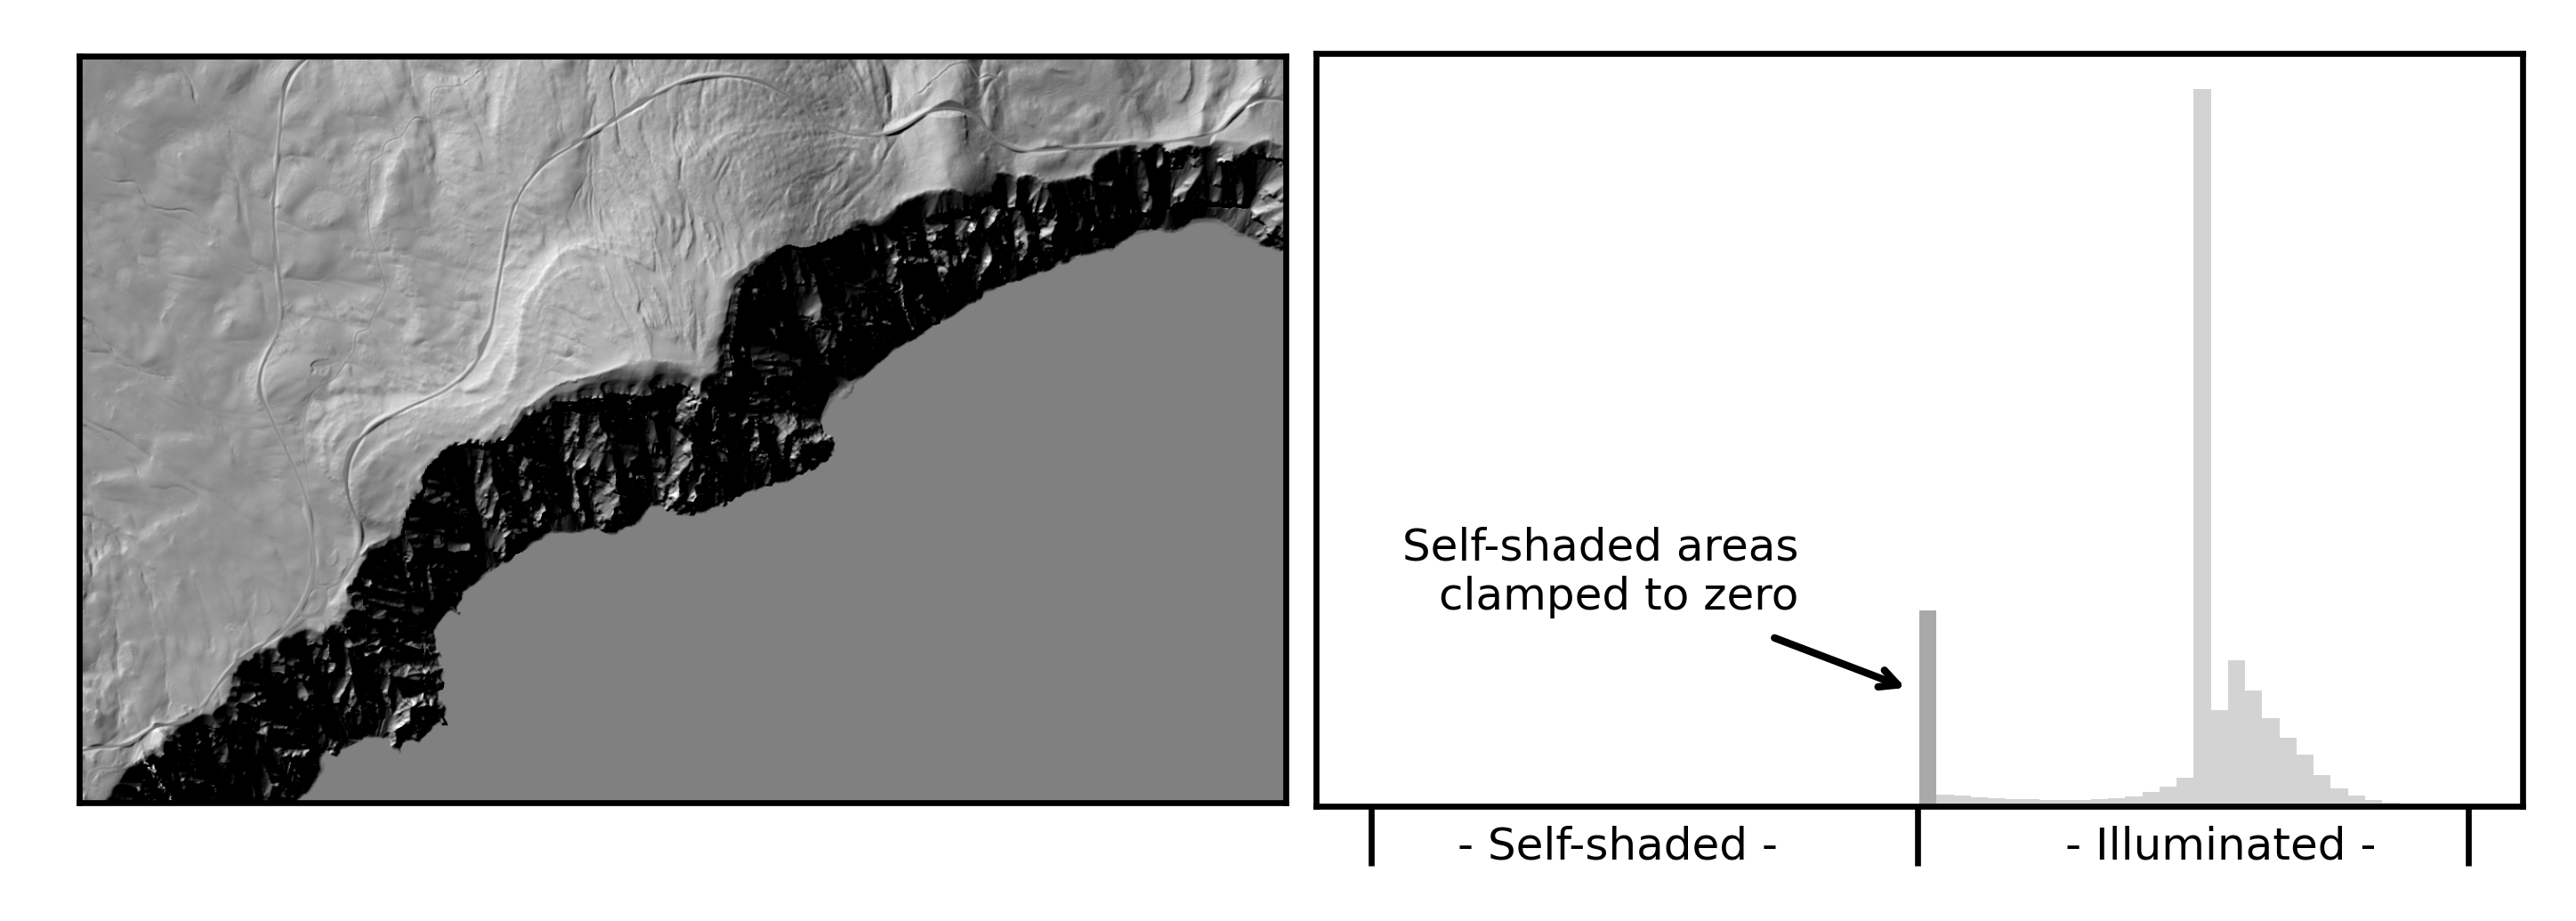

In [11]:
w_ = 15*cm
fig, axes = plt.subplots(1, 2 , figsize=(w_, 0.11*cm + (w_/2)/phi))
fig.set_dpi(600)
#fig.suptitle('Hard vs Soft Hillshade', fontsize=22)

#Hard HS 
axes[0].yaxis.set_visible(False)
axes[0].xaxis.set_visible(False)
axes[0].imshow(hard_hs, cmap='gray', vmin=0, vmax=255)

# Hard Histogram
axes[1].yaxis.set_visible(False)
axes[1].xaxis.set_visible(True)
h_=(hard_hs)/2 + 128
axes[1].set_xticks([0,127,255])
axes[1].set_xticklabels(['', '',''])
axes[1].tick_params(direction='out', length=8)
axes[1].text(0.25, -0.025, '- Self-shaded -',
        verticalalignment='top', horizontalalignment='center',
        transform=axes[1].transAxes,
        color='k', fontsize=6)
axes[1].text(0.75, -0.025, '- Illuminated -',
        verticalalignment='top', horizontalalignment='center',
        transform=axes[1].transAxes,
        color='k', fontsize=6)
axes[1].hist(h_[h_>128].ravel(), color='lightgray', bins=64, range=[0, 255])
axes[1].hist(h_[h_==128].ravel(), color='darkgray', bins=64, range=[0, 255])
axes[1].annotate("Self-shaded areas\nclamped to zero",
            xy=(0.5, 0.15), xycoords='axes fraction',
            xytext=(0.4, 0.25), textcoords='axes fraction',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3", color='k'),
            horizontalalignment='right', verticalalignment='bottom', fontsize=6, color='k'
            )
fig.subplots_adjust(hspace=0.0)
fig.subplots_adjust(wspace=0.025)